In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm

# The competition datafiles are in the directory ../input
# Read competition data files:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")


train_x = train.values[:,1:]
train_y = train.ix[:,0]
test_x = test.values

pca = PCA(n_components=0.9,whiten=True)
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

In [2]:
import sklearn
xtrain,xval,ytrain,yval=sklearn.cross_validation.train_test_split(train_x,train_y,test_size=0.33,random_state=42)
print xtrain.shape, xval.shape, ytrain.shape, yval.shape

(28140, 43) (13860, 43) (28140,) (13860,)


In [3]:
def support_vector_machine(c_value,xtrain,ytrain,xval,yval):
    svc = svm.SVC(kernel='rbf',C=c_value)
    svc.fit(xtrain, ytrain)
    
    y_hat=svc.predict(xval)
    return sklearn.metrics.accuracy_score(y_hat,yval)

In [11]:
import numpy as np
c_list=np.arange(11,21,1)
score_list=map(lambda x: support_vector_machine(x,xtrain,ytrain,xval,yval) ,c_list)

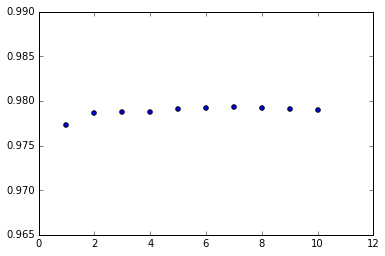

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(c_list,score_list)
plt.show()

In [8]:
c_list1=c_list
score_list1=score_list

In [12]:
c_list2=c_list
score_list2=score_list

In [14]:
score_list1

[0.97727272727272729,
 0.97864357864357865,
 0.97878787878787876,
 0.97871572871572876,
 0.9790764790764791,
 0.97922077922077921,
 0.97936507936507933,
 0.9791486291486291,
 0.9790764790764791,
 0.97900432900432899]

In [31]:
aaa=list(np.concatenate((score_list1,score_list2),axis=0))
aaa.index(max(aaa))

6

In [33]:
bbb=list(np.concatenate((c_list1,c_list2),axis=0))
bbb[6]

7

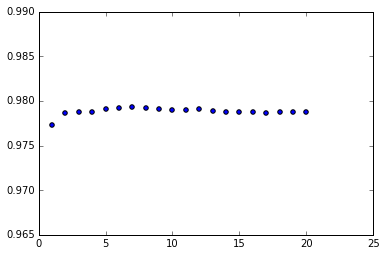

In [25]:
plt.scatter(np.concatenate((c_list1,c_list2),axis=0),np.concatenate((score_list1,score_list2),axis=0))

plt.show()

In [34]:
svc = svm.SVC(kernel='rbf',C=7)
svc.fit(xtrain, ytrain)

test_y = svc.predict(test_x)
pd.DataFrame({"ImageId": range(1,len(test_y)+1), "Label": test_y}).to_csv('svm2_with_validation.csv', index=False, header=True)